In [48]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import pandas as pd
import seaborn as sns

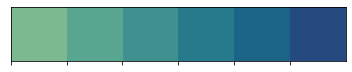

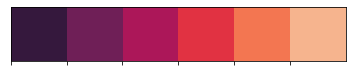

In [49]:
#DEFINIMOS PALETA DE COLOR AESTHETIC DE AZULES
cold_palette = sns.color_palette('crest') # Default color palette
#print(cold_palette)  # Prints the RGB tuples that make up this color palette
sns.palplot(cold_palette) # Plotting your palette!
#sns.palplot(cold_palette[0])

hot_palette = sns.color_palette('rocket') 
sns.palplot(hot_palette)
#RdPu

#plt.show()

In [50]:
directory = 'data_133_testborn'
parent_dir = 'c:/Users/Zoe/Desktop/Labo 67/imagenes/'
archivo='ruido_T.txt'
file_path = os.path.join(parent_dir, directory, archivo)


In [54]:
temperatura=[60,60,60,60,60,60,60,60,60,60,100,100,100,100,60,60,60,60,160,160,160,160,210,210,180,180,150,150,150,100,100,100,100,70,70,70,70]
temperatura=np.repeat(100,116)
print(len(temperatura))

116


In [55]:
df = pd.read_csv(file_path, sep=',',  header=0, lineterminator='\n')
#print(df)

#agrero temp a df
df.insert(loc=5, column='temperatura', value=temperatura)

#print(df)
#Saco datos que no pudo ajustar:

#df.iloc[:,2] = df.iloc[:,2].str.replace('\r', '')
# Replace 'NaN' strings with actual NaN values
df = df.replace('nan', np.nan)
# Remove rows with any NaN values
df_cleaned = df.dropna(how='any')

#df_cleaned = df_cleaned.drop(28)

#print(df_cleaned)





#print(df_cleaned)


In [56]:
#Filtrado
df_cleaned = df_cleaned[df_cleaned['sigmaOS'] <= 1]
df_cleaned = df_cleaned[df_cleaned['sigmaOS'] > 0]

In [57]:
ids = df_cleaned.iloc[:,0]
ruido = df_cleaned.iloc[:,1]
error_ruido = df_cleaned.iloc[:,2].astype(float)
ruido2 = df_cleaned.iloc[:,3]
lambda_see = df_cleaned.iloc[:,4]
temperatura=df_cleaned.iloc[:,5]

dias=0.039 
lambda_see=lambda_see/dias


Text(0, 0.5, 'Ruido [e-]')

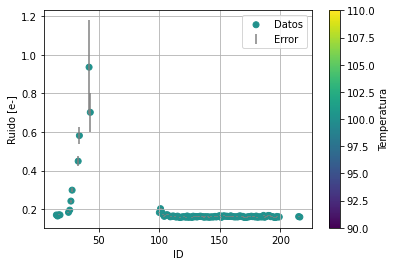

In [58]:
colors=df_cleaned['temperatura']

plt.grid()
#plt.errorbar(ids, ruido, yerr=error_ruido, fmt='.', color='gray')
plt.errorbar(ids, ruido, yerr=error_ruido, fmt='none', ecolor='gray', label='Error')
plt.scatter(ids, ruido, c=colors, cmap='viridis', marker='o', label='Datos')
plt.colorbar(label='Temperatura')
plt.legend()
plt.xlabel("ID")
plt.ylabel("Ruido [e-]")

In [ ]:
print(ids)

0     115
1     116
2     117
3     118
4     125
5     126
6     127
7     128
8     133
9     134
10     15
11     16
12     17
13     18
14    192
15    193
16    215
17    216
18     25
19     26
20     27
21     28
22     33
23     34
29     65
30     66
31     67
32     68
33     87
34     88
35     89
36     90
Name: ID, dtype: int64


0      10.388323
1      10.461097
2      10.414198
3      11.534236
4      10.741985
         ...    
108     9.700132
109     2.564103
110     5.736051
113     2.564103
114     2.564103
Name: lambda \r, Length: 113, dtype: float64


Text(0, 0.5, 'Ruido por píxel [e-/pix /day]')

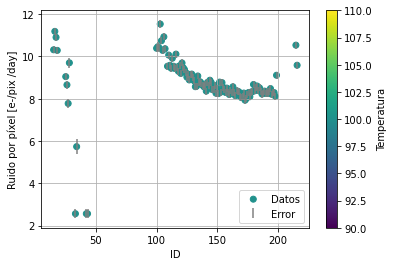

In [59]:
colors=df_cleaned['temperatura']
plt.grid()

print(lambda_see)


plt.errorbar(ids, lambda_see, yerr=ruido2, fmt='none', ecolor='gray', label='Error')
plt.scatter(ids, lambda_see, c=colors, cmap='viridis', marker='o', label='Datos')

plt.colorbar(label='Temperatura')
plt.legend()
plt.xlabel("ID")
plt.ylabel("Ruido por píxel [e-/pix /day]")

Text(0, 0.5, 'Ruido por píxel [e-/pix]')

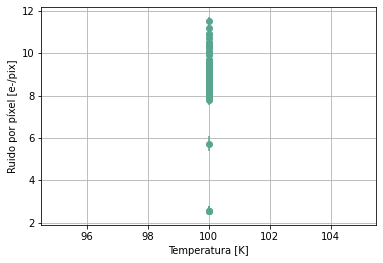

In [60]:

plt.grid()
plt.errorbar(temperatura, lambda_see, yerr=ruido2, fmt='o', color=cold_palette[1])
#plt.legend()
plt.xlabel("Temperatura [K]")
plt.ylabel("Ruido por píxel [e-/pix]")


Text(0, 0.5, 'Ruido [e-]')

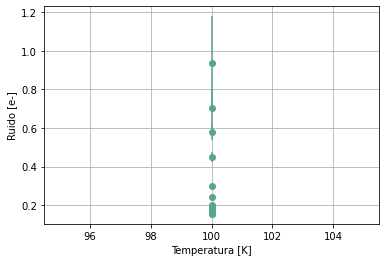

In [61]:
plt.grid()
plt.errorbar(temperatura, ruido, yerr=error_ruido, fmt='o', color=cold_palette[1])
#plt.legend()
plt.xlabel("Temperatura [K]")
plt.ylabel("Ruido [e-]")
